In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [34]:
exam = pd.read_csv("/content/StudentPerformanceFactors.csv")
exam.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


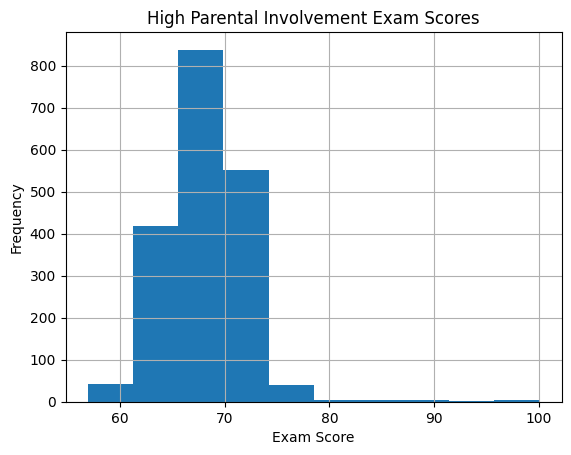

In [46]:
exam[exam["Parental_Involvement"] == "High"]["Exam_Score"].hist()
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.title("High Parental Involvement Exam Scores")
plt.show()

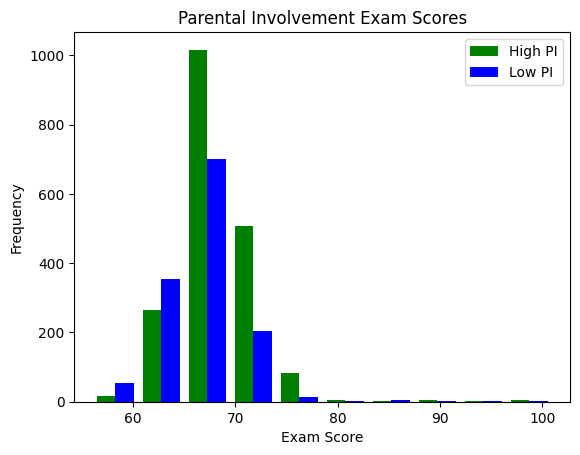

In [57]:
high_parental_involvement_score = exam[exam["Parental_Involvement"] == "High"]["Exam_Score"]
low_parental_involvement_score = exam[exam["Parental_Involvement"] == "Low"]["Exam_Score"]

plt.hist([high_parental_involvement_score,low_parental_involvement_score],label=["High PI","Low PI"] , color=["green","blue"])
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.title("Parental Involvement Exam Scores")
plt.legend()
plt.show()

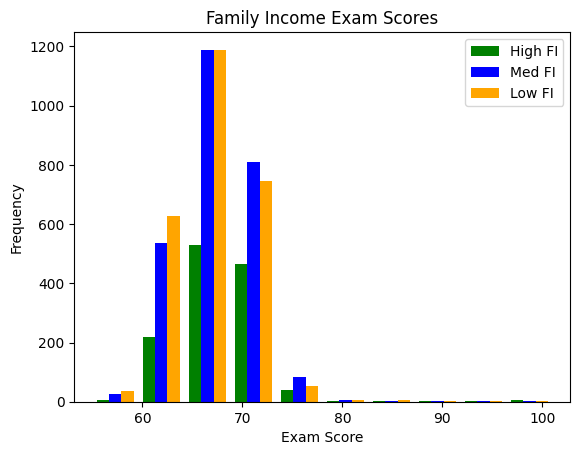

In [58]:
high_fi = exam[exam["Family_Income"] == "High"]["Exam_Score"]
med_fi = exam[exam["Family_Income"] == "Medium"]["Exam_Score"]
low_fi = exam[exam["Family_Income"] == "Low"]["Exam_Score"]

plt.hist([high_fi,med_fi,low_fi] , label=["High FI","Med FI","Low FI"],color=["green","blue","orange"])
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.title("Family Income Exam Scores")
plt.legend()
plt.show()


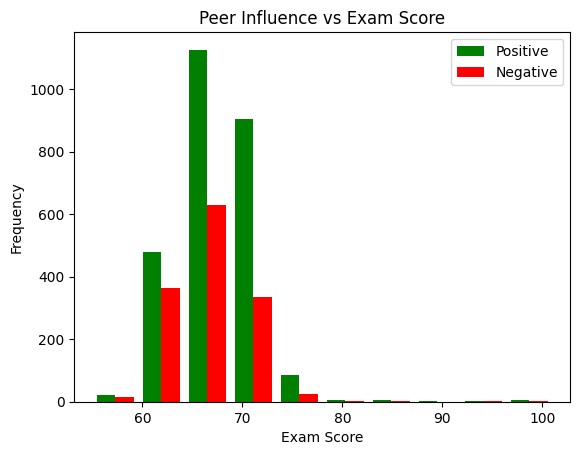

In [59]:
pos_peer = exam[exam["Peer_Influence"] == "Positive"]["Exam_Score"]
neg_peer = exam[exam["Peer_Influence"] == "Negative"]["Exam_Score"]

plt.hist([pos_peer,neg_peer],label=["Positive","Negative"],color=["green","red"])
plt.title("Peer Influence vs Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

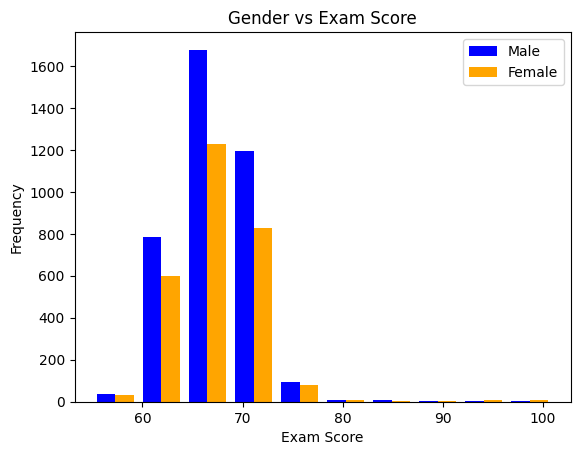

In [60]:
male = exam[exam["Gender"] == "Male"]["Exam_Score"]
female = exam[exam["Gender"] == "Female"]["Exam_Score"]

plt.hist([male,female],label=["Male","Female"],color=["blue","orange"])
plt.title("Gender vs Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [66]:
def cat_cols(df):
  for col in df:
    if df[col].dtype == "object":
      print(f'{col} : {df[col].unique()}')

cat_cols(exam)

Parental_Involvement : ['Low' 'Medium' 'High']
Access_to_Resources : ['High' 'Medium' 'Low']
Extracurricular_Activities : ['No' 'Yes']
Motivation_Level : ['Low' 'Medium' 'High']
Internet_Access : ['Yes' 'No']
Family_Income : ['Low' 'Medium' 'High']
Teacher_Quality : ['Medium' 'High' 'Low' nan]
School_Type : ['Public' 'Private']
Peer_Influence : ['Positive' 'Negative' 'Neutral']
Learning_Disabilities : ['No' 'Yes']
Parental_Education_Level : ['High School' 'College' 'Postgraduate' nan]
Distance_from_Home : ['Near' 'Moderate' 'Far' nan]
Gender : ['Male' 'Female']


In [72]:
exam = exam.replace(["Yes","No"],[1,0])
exam = exam.replace(["Male","Female"],[1,0])
exam = exam.replace(["Public","Private"],[1,0])

<ipython-input-72-2ba9f4ff9f77>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exam = exam.replace(["Public","Private"],[1,0])


In [73]:
exam.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,Low,1,0,Low,Medium,1,Positive,3,0,High School,Near,1,67
1,19,64,Low,Medium,0,8,59,Low,1,2,Medium,Medium,1,Negative,4,0,College,Moderate,0,61
2,24,98,Medium,Medium,1,7,91,Medium,1,2,Medium,Medium,1,Neutral,4,0,Postgraduate,Near,1,74
3,29,89,Low,Medium,1,8,98,Medium,1,1,Medium,Medium,1,Negative,4,0,High School,Moderate,1,71
4,19,92,Medium,Medium,1,6,65,Medium,1,3,Medium,High,1,Neutral,4,0,College,Near,0,70


In [78]:
exam.drop("Distance_from_Home",axis=1,inplace=True)

In [82]:
exam["Teacher_Quality"] = exam["Teacher_Quality"].fillna("Medium")

In [86]:
exam["Parental_Education_Level"] = exam["Parental_Education_Level"].fillna("High School")
exam.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [91]:
# cat_cols(exam)
exam = pd.get_dummies(exam,columns=["Parental_Involvement","Access_to_Resources","Motivation_Level",
                                    "Family_Income","Teacher_Quality","Peer_Influence","Parental_Education_Level"])

In [94]:
exam.replace([True,False],[1,0],inplace=True)

<ipython-input-94-4b58dd7f1b36>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  exam.replace([True,False],[1,0],inplace=True)


In [95]:
exam.head()

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,...,Family_Income_Medium,Teacher_Quality_High,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,23,84,0,7,73,1,0,1,3,0,...,0,0,0,1,0,0,1,0,1,0
1,19,64,0,8,59,1,2,1,4,0,...,1,0,0,1,1,0,0,1,0,0
2,24,98,1,7,91,1,2,1,4,0,...,1,0,0,1,0,1,0,0,0,1
3,29,89,1,8,98,1,1,1,4,0,...,1,0,0,1,1,0,0,0,1,0
4,19,92,1,6,65,1,3,1,4,0,...,1,1,0,0,0,1,0,1,0,0


In [96]:
exam.dtypes

,0
Hours_Studied,int64
Attendance,int64
Extracurricular_Activities,int64
Sleep_Hours,int64
Previous_Scores,int64
Internet_Access,int64
Tutoring_Sessions,int64
School_Type,int64
Physical_Activity,int64
Learning_Disabilities,int64


In [98]:
exam

,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,...,Family_Income_Medium,Teacher_Quality_High,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,23,84,0,7,73,1,0,1,3,0,...,0,0,0,1,0,0,1,0,1,0
1,19,64,0,8,59,1,2,1,4,0,...,1,0,0,1,1,0,0,1,0,0
2,24,98,1,7,91,1,2,1,4,0,...,1,0,0,1,0,1,0,0,0,1
3,29,89,1,8,98,1,1,1,4,0,...,1,0,0,1,1,0,0,0,1,0
4,19,92,1,6,65,1,3,1,4,0,...,1,1,0,0,0,1,0,1,0,0


In [99]:
from sklearn.preprocessing import MinMaxScaler
scale_cols = ["Hours_Studied","Attendance","Sleep_Hours","Previous_Scores","Tutoring_Sessions","Physical_Activity",
              "Exam_Score"]
scaler = MinMaxScaler()

exam[scale_cols] = scaler.fit_transform(exam[scale_cols])


In [101]:
exam[scale_cols]

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,0.260870
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,0.130435
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,0.413043
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,0.347826
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,0.326087
...,...,...,...,...,...,...,...
6602,0.558140,0.225,0.500000,0.52,0.125,0.333333,0.282609
6603,0.511628,0.400,0.666667,0.62,0.375,0.333333,0.304348
6604,0.441860,0.750,0.333333,0.30,0.375,0.333333,0.282609
6605,0.209302,0.650,0.333333,0.82,0.250,0.500000,0.282609


In [102]:
X = exam.drop("Exam_Score",axis=1)
y = exam["Exam_Score"]

In [105]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
X_train.shape

(5285, 32)

In [107]:
X_test.shape

(1322, 32)

In [108]:
y_train.shape

(5285,)

In [109]:
y_test.shape

(1322,)

In [111]:
##### Linear Regressor
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [112]:
lin_pred = lin_model.predict(X_test)

In [113]:
y_test.head(5)

,Exam_Score
743,0.217391
5551,0.217391
3442,0.347826
6571,0.195652
4204,0.239130


In [114]:
lin_pred[:5]

array([0.20160675, 0.22926331, 0.35394287, 0.20773315, 0.24480438])

In [117]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test,lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse*100

3.9848656143213286

In [121]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_model,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-scores)
print(f'Scores : {lin_rmse_scores}')
print(f'Mean : {lin_rmse_scores.mean()}')
print(f'Std : {lin_rmse_scores.std()}')

Scores : [0.03737487 0.03377379 0.04667426 0.02036252 0.02687641 0.0568177
 0.05242528 0.04331799 0.06024034 0.06279316]
Mean : 0.04406563170689291
Std : 0.013638913549056348


In [122]:
#### Decisino Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [123]:
tree_pred = tree_model.predict(X_test)

In [124]:
tree_pred[:5]

array([0.19565217, 0.23913043, 0.34782609, 0.23913043, 0.23913043])

In [125]:
y_test.head(5)

,Exam_Score
743,0.217391
5551,0.217391
3442,0.347826
6571,0.195652
4204,0.239130


In [126]:
tree_score = cross_val_score(tree_model, X_train , y_train , scoring = "neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-tree_score)
print(f'Scores : {tree_rmse_scores}')
print(f'Mean : {tree_rmse_scores.mean()}')
print(f'Std : {tree_rmse_scores.std()}')

Scores : [0.06798726 0.07810753 0.07606787 0.05091703 0.06382587 0.09936932
 0.0899119  0.06044518 0.09664786 0.07747996]
Mean : 0.07607597832549753
Std : 0.015020320861403754


In [127]:
##### Random Forest
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [128]:
forest_pred = forest_model.predict(X_test)

In [129]:
y_test.head(5)

,Exam_Score
743,0.217391
5551,0.217391
3442,0.347826
6571,0.195652
4204,0.239130


In [130]:
forest_pred[:5]

array([0.20086957, 0.24608696, 0.33391304, 0.24      , 0.25043478])

In [131]:
forest_scores = cross_val_score(forest_model,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(f'Scores : {forest_rmse_scores}')
print(f'Mean : {forest_rmse_scores.mean()}')
print(f'Std : {forest_rmse_scores.std()}')

Scores : [0.04374145 0.04138129 0.05348221 0.03338334 0.03634224 0.06107158
 0.0580484  0.05091226 0.06621921 0.06800117]
Mean : 0.05125831341115332
Std : 0.011608985856995007


In [132]:
import joblib as j

models = [lin_model,tree_model,forest_model]
for model in models:
  j.dump(model,f'{model}_student_exam_score.pkl')